# Using mat-info-tools

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# set directory
tools_directory = '/Users/emuckley/Documents/GitHub/mat-info-tools'

sys.path.append(tools_directory)
import mat_info_tools


## Featurize some chemical formulas

In [2]:
df = pd.DataFrame({
    'formula': ['C12', 'Ti', 'TiO2', 'ZrO2', '(TiO2)0.4(GaO)0.6'],
})

feat, refs = mat_info_tools.featurize(df, formula_col='formula')


Featurizing dataset...



Kept 146 / 401 new features for 5 materials.


In [3]:
feat

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,Ti,Ga,Zr,Yang omega,Yang delta,mean simul. packing efficiency,mean abs simul. packing efficiency,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010
formula,,,,,,,,,,,,,,,,,,,,,
C12,6.0,6.0,0.0,6.000000,0.000000,6.0,77.0,77.0,0.0,77.000000,...,0.000000,0.00,0.000000,0.000000e+00,0.000000,0.023994,0.023994,1.000000,1.000000,1.000000
Ti,22.0,22.0,0.0,22.000000,0.000000,22.0,43.0,43.0,0.0,43.000000,...,1.000000,0.00,0.000000,0.000000e+00,0.000000,0.023994,0.023994,1.000000,1.000000,1.000000
TiO2,8.0,22.0,14.0,12.666667,6.222222,8.0,43.0,87.0,44.0,72.333333,...,0.333333,0.00,0.000000,3.617244e+06,0.408551,-0.004494,0.006738,0.000000,0.043041,0.097658
ZrO2,8.0,40.0,32.0,18.666667,14.222222,8.0,44.0,87.0,43.0,72.666667,...,0.000000,0.00,0.333333,3.947111e+06,0.464811,-0.038681,0.038681,0.037712,0.150186,0.245179
(TiO2)0.4(GaO)0.6,8.0,31.0,23.0,16.083333,9.430556,8.0,43.0,87.0,44.0,76.416667,...,0.166667,0.25,0.000000,3.440169e+06,0.382822,-0.029453,0.031994,0.029161,0.040135,0.047651


In [4]:
print(refs)

['@article{ward_agrawal_choudary_wolverton_2016, title={A general-purpose machine learning framework for predicting properties of inorganic materials}, volume={2}, DOI={10.1038/npjcompumats.2017.28}, number={1}, journal={npj Computational Materials}, author={Ward, Logan and Agrawal, Ankit and Choudhary, Alok and Wolverton, Christopher}, year={2016}}', '@article{meredig_agrawal_kirklin_saal_doak_thompson_zhang_choudhary_wolverton_2014, title={Combinatorial screening for new materials in unconstrained composition space with machine learning}, volume={89}, DOI={10.1103/PhysRevB.89.094104}, number={1}, journal={Physical Review B}, author={B. Meredig, A. Agrawal, S. Kirklin, J. E. Saal, J. W. Doak, A. Thompson, K. Zhang, A. Choudhary, and C. Wolverton}, year={2014}}', '@article{Butler1978, author = {Butler, M A and Ginley, D S}, doi = {10.1149/1.2131419}, isbn = {0013-4651}, issn = {00134651}, journal = {Journal of The Electrochemical Society}, month = {feb}, number = {2}, pages = {228--232

## Export featurized data

In [5]:
mat_info_tools.export_df(
    feat,
    'example_featurized_data.csv',
    data_dir='data'
)

## Plot data

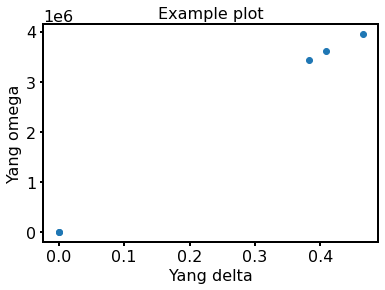

In [9]:
xcol, ycol = 'Yang delta', 'Yang omega'

plt.scatter(feat[xcol], feat[ycol])
                             
mat_info_tools.plot_setup(
    xlabel=xcol, ylabel=ycol,
    title='Example plot',
    legend=False,
)

plt.show()

## Error quantification

In [3]:
mat_info_tools.get_rmse([4.5, 5, 2, 4, 2.4])

3.769